In [1]:
###Imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import time
from sklearn.preprocessing import StandardScaler

#Plot Size
plt.rcParams["figure.figsize"] = (14, 8)

In [2]:
###Load Data
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

### Train Test Split

In [3]:
X = df.drop(["count","casual","registered"], axis=1)
y = df["count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### Data Exploration

In [4]:
eda = X_train.join(y_train)

In [5]:
eda.isna().any().sum()

0

In [6]:
#Transform date column to datetime format
eda["datetime"] = pd.to_datetime(eda["datetime"])


In [7]:
#Create time columns
eda["hour"] = eda["datetime"].dt.hour
eda["day"] = eda["datetime"].dt.day
eda["month"] = eda["datetime"].dt.month
eda["year"] = eda["datetime"].dt.year
eda["yday"] = eda["datetime"].dt.dayofyear
eda["wday"] = eda["datetime"].dt.dayofweek

In [8]:
#Create column for weekend
eda.loc[(eda["datetime"].apply(lambda x: x.weekday() > 4)), "weekend"] = 1
eda.loc[(eda["datetime"].apply(lambda x: x.weekday() <= 4)), "weekend"] = 0


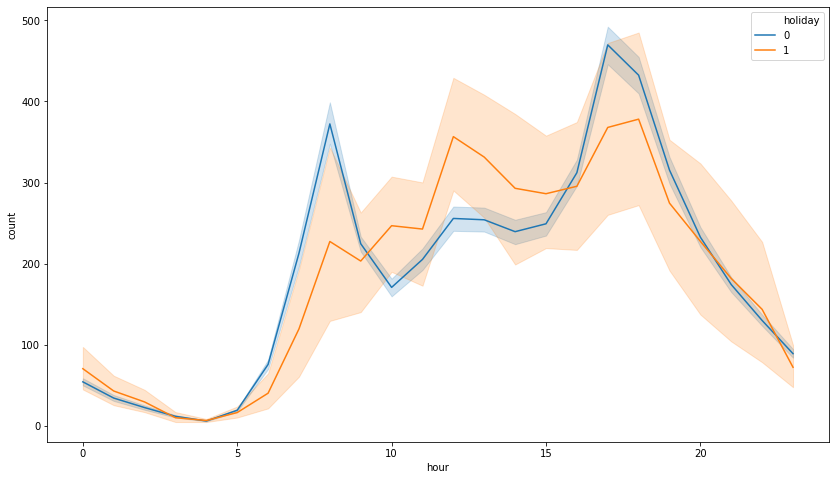

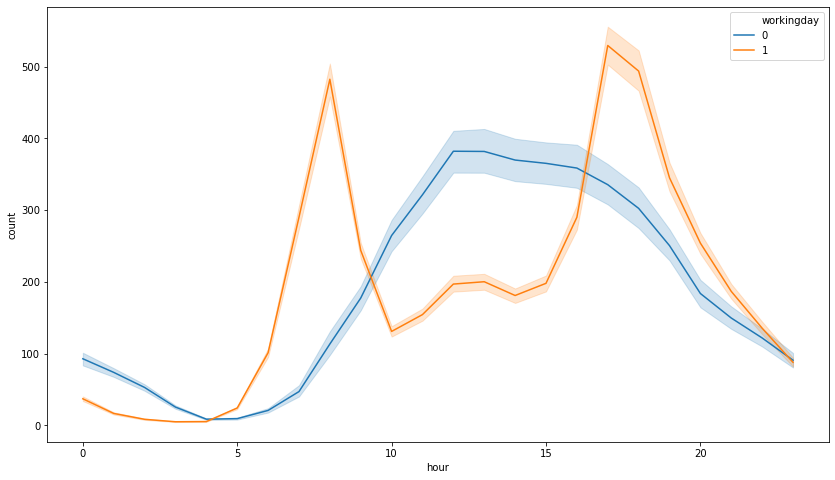

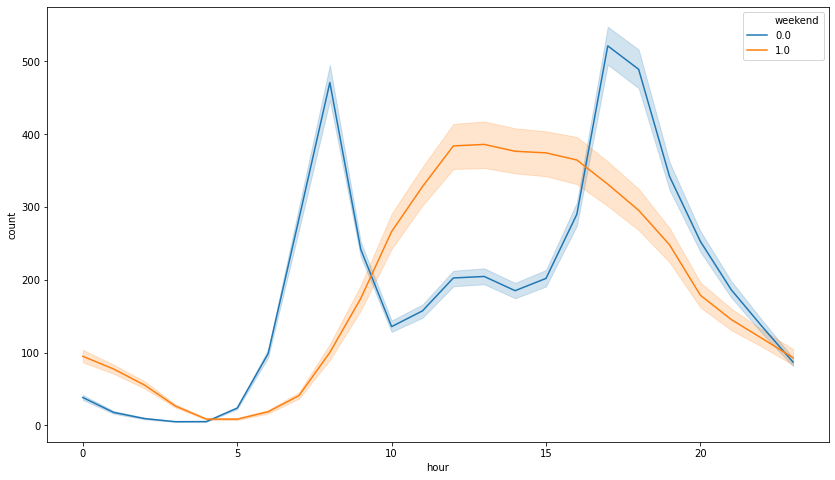

In [9]:
#Difference between holiday, weekday and weekend

sns.lineplot(x=eda["hour"],y=eda["count"],hue=eda["holiday"])
plt.show()
sns.lineplot(x=eda["hour"],y=eda["count"],hue=eda["workingday"])
plt.show()
sns.lineplot(x=eda["hour"],y=eda["count"],hue=eda["weekend"])

# daytype = train[(train["holiday"] == 0)
#     & (train["workingday"] == 0)
#                     ]
# daytype

In [10]:
#Overall Average
overall_mean = int(round(eda["count"].mean()))
print(f"Average Usage overall: {overall_mean}")

#Average usage on holidays
holiday_mean = int(round(eda["count"].loc[(eda["holiday"] == 1)].mean()))
print(f"Average Usage on holidays: {holiday_mean}")

noholiday_mean = int(round(eda["count"].loc[(eda["holiday"] == 0)].mean()))
print(f"Average Usage on non-holidays: {noholiday_mean}")

#Average usage on weekends
weekend_mean = int(round(eda["count"].loc[(eda["weekend"] == 1)].mean()))
print(f"Average Usage on weekends: {weekend_mean}")

workingday_mean = int(round(eda["count"].loc[(eda["workingday"] == 1)].mean()))
print(f"Average Usage on working days: {workingday_mean}")


Average Usage overall: 191
Average Usage on holidays: 185
Average Usage on non-holidays: 191
Average Usage on weekends: 188
Average Usage on working days: 192


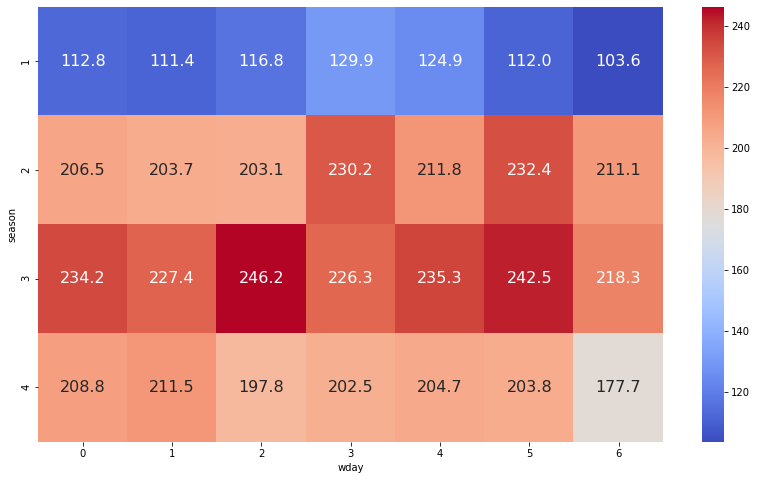

In [11]:

#Usage per weekday through the seasons
heat = pd.pivot_table(data=eda,
                    index='season',
                    values='count',
                    columns='wday',
                    aggfunc=np.mean)

heat
sns.heatmap(data=heat,cmap='coolwarm', annot=True, fmt=".1f", annot_kws={'size':16})



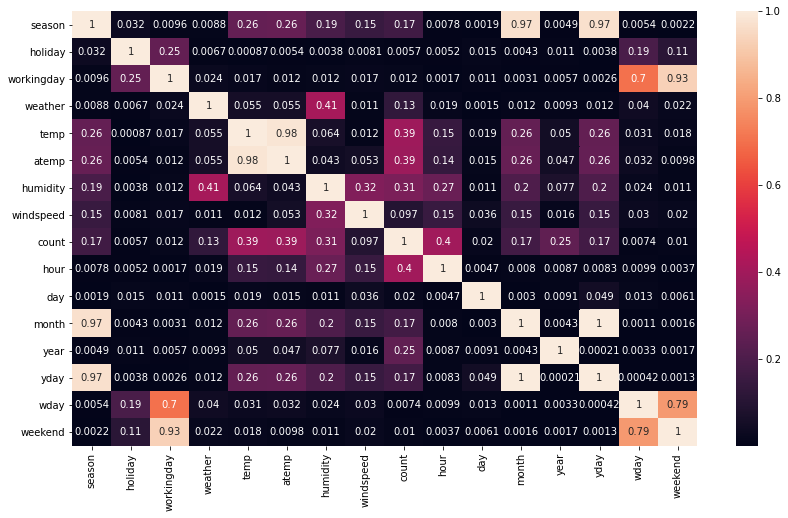

In [17]:
#Correlations
sns.heatmap(eda.corr().abs(), annot=True)



In [13]:
#Pairplot
# pair = eda[eda["month"] == 6]
# sns.pairplot(pair,
#         palette="husl",
#         plot_kws={'line_kws':{'color':'red'}},
#         kind="reg")

### Feature Engineering

In [14]:
#Relevant Categories
cats = [
    "season",
    "weather",
    "temp",
    "atemp",
    "humidity",
    "hour",
    "month",
    "year",
    "yday"
        ]

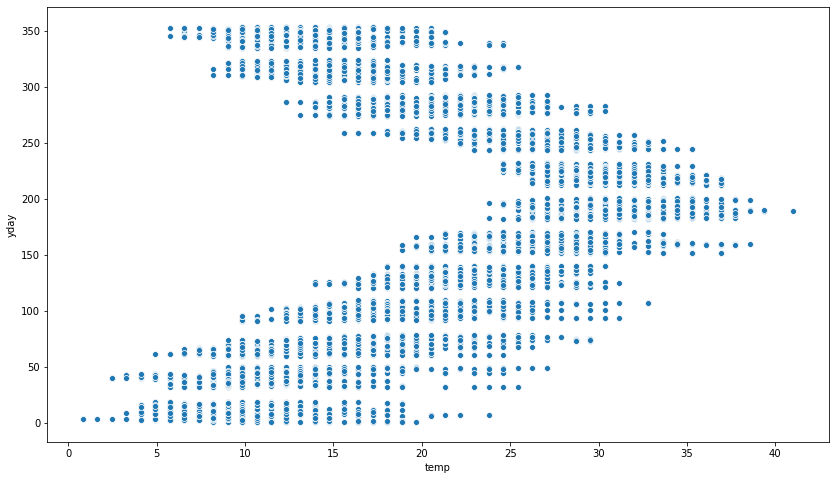

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1.25631174 0.74391796]


(-2.7458036743742302, 2.9409679030518, -1.83660403250805, 1.8508902362245663)

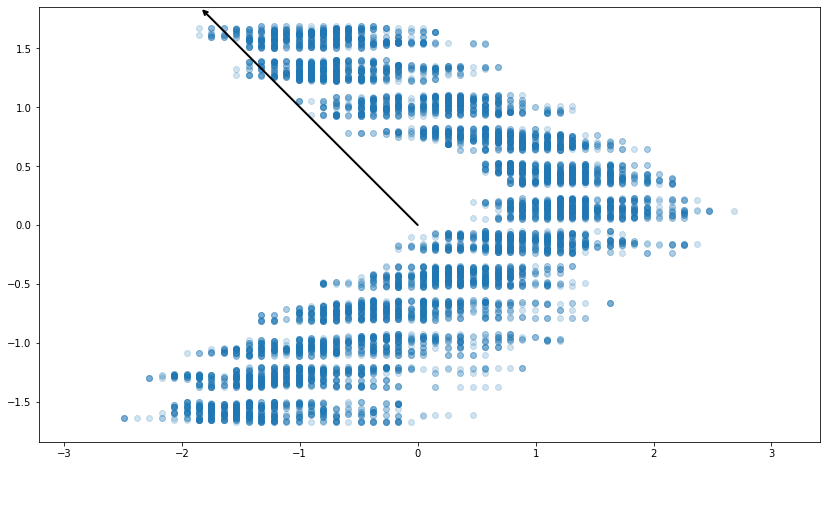

In [15]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



features = [
    "temp",
    "yday"
        ]

sns.scatterplot(eda[features[0]],eda[features[1]])
plt.show()

X_train = eda[features]
X_train

X_train = StandardScaler().fit_transform(X_train)

pca = PCA(n_components=2)
pca.fit_transform(X_train)

print(pca.components_)

print(pca.explained_variance_)


def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')



### Train a model

In [16]:


m = LinearRegression()

m.fit(X_train,y_train)

print(m.score(X_train,y_train))

0.1609708793183544
